In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [3]:
class ANN:
    inputs = np.inf
    outputs = np.inf
    hnns = np.inf
    reg = np.inf
    ep = np.inf
    W1 = np.inf
    W2 = np.inf
    b1 = np.inf
    b2 = np.inf
    A1 = np.inf
    A2 = np.inf
    acc = np.inf
    cost = np.inf
    
    def __init__(self,inputs,outputs,hnns,reg,ep):
        self.inputs = inputs
        self.outputs = outputs
        self.hnns = hnns
        self.reg = reg
        self.ep = ep
        self.W1 = np.random.randn(inputs, hnns)
        self.W2 = np.random.randn(hnns, outputs)
        self.b1 = np.zeros((1, hnns))
        self.b2 = np.zeros((1, outputs))

           
    def train(self, X, y, loop):
        for i in xrange(0, loop):
            self.fc(X)
            self.bp(X,y)
           # if i % 1000 == 0:
           #     print "Acc {}".format(self.costF(X, y))
                             
    def fc(self, X):
        W1, b1, W2, b2 = self.W1, self.b1, self.W2, self.b2
        #向前计算
        Z1 = X.dot(W1) + b1
        A1 = self.tanh(Z1)
        Z2 = A1.dot(W2) + b2
        A2 = self.softmax(Z2)
        #更新属性值
        self.A1, self.A2 = A1, A2
        
    def bp(self, X, y):
        W1, b1, W2, b2 = self.W1, self.b1, self.W2, self.b2
        A1, A2 = self.A1, self.A2
        A2[range(X.shape[0]), y] -= 1
        
        #向前计算
        delta3 = A2
        delta2 = delta3.dot(W2.T) * (1 - np.power(A1, 2))
        dW2 = (A1.T).dot(delta3) + (self.reg * W2)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        dW1 = (X.T).dot(delta2) + (self.reg * W1)
        db1 = np.sum(delta2, axis=0, keepdims=True)
        W2 += -self.ep * dW2
        b2 += -self.ep * db2
        W1 += -self.ep * dW1
        b1 += -self.ep * db1  
        
        #更新属性值
        self.W2 = W2
        self.b2 = b2
        self.W1 = W1
        self.b1 = b1
        
    def costF(self, X, y):
        #数据初始化
        W1, W2 = self.W1, self.W2
        reg = self.reg
        self.fc(X)
        A2 = self.A2
        
        #计算损失
        y_bar = A2[range(X.shape[0]), y]
        y_loss = (1.0 / X.shape[0]) * np.sum(-np.log(y_bar))
        r_loss = (reg / 2.0) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
        cost = y_loss + r_loss
        return cost
    
    def acc(self, X, y):
        self.fc(X)
        y_bar = self.A2[range(X.shape[0]), y]
        acc = 100.0 * sum(y_bar == y) / y.size
        return acc
    
    def predict(self, X):
        self.fc(X)
        pt = np.argmax(self.A2, axis=1)
        return  pt
     
    def sigmoid(self, Z):
        h = 1.0 / (1.0 + np.exp(-Z))
        return h
                
    def tanh(self, Z):
        h = np.tanh(Z)
        return h
                
    def softmax(self, Z):
        h = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
        return h
                   
    def get_items(self):
        items = {'W1':self.W1, 'W2':self.W2, 'b1':self.b1, 'b2':self.b2, 
                 'A1':self.A1, 'A2':self.A2, 'inputs':self.inputs, 'outputs':self.outputs,
                 'hnn':self.hnns, 'reg':self.reg, 'ep':self.ep}
        return items
        
    def plotdb(self, X, y, axes=None):
        x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
        y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        X_G = np.c_[xx.ravel(), yy.ravel()]
        zz = self.predict(X_G)
        zz = zz.reshape(xx.shape)
        color = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
        if axes == None:
            axes = plt.gca()
        plt.pcolormesh(xx, yy, zz, cmap=color)
        plt.contour(xx, yy, zz, color='g')
        plt.scatter(X[:,0], X[:,1], s=20, c=y, cmap=plt.cm.Spectral)  
        
    def loaddata(self):
        N = 100 # 每类样本个数
        D = 2 # 维度
        K = 3 # 类别数
        X = np.zeros((N*K,D)) # data matrix (each row = single example)
        y = np.zeros(N*K, dtype='uint8') # class labels
        for j in xrange(K):
            ix = range(N*j,N*(j+1))
            r = np.linspace(0.0,1,N) # 半径
            t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # 角度，加上是一个随机噪声
            X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            y[ix] = j
        # lets visualize the data:
        #plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        return X, y
    
    def plotSd(self, X, y):
        plt.figure(figsize=(16, 32))
        h_dims = [1, 2, 4, 16, 32, 64, 128, 256, 512, 1024]
        for i,dim in enumerate(h_dims):
            plt.subplot(5,3,i+1)
            plt.title("Hidden layer size {}".format(dim))
            self.hnns = h_dims
            self.train(X, y, 20000)
            self.plotdb(X, y)   

Acc 96.0


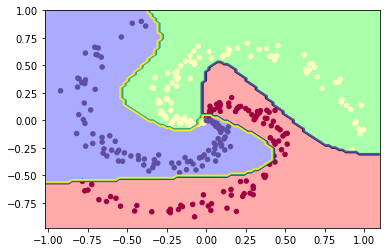

In [6]:
net = ANN(2, 3, 5, 0.1, 0.01)
X, y = net.loaddata()
net.train(X, y, 1000)
net.plotdb(X, y)
y_p = net.predict(X)
print "Acc {}".format(100.0 * sum(y_p == y) / y.size)

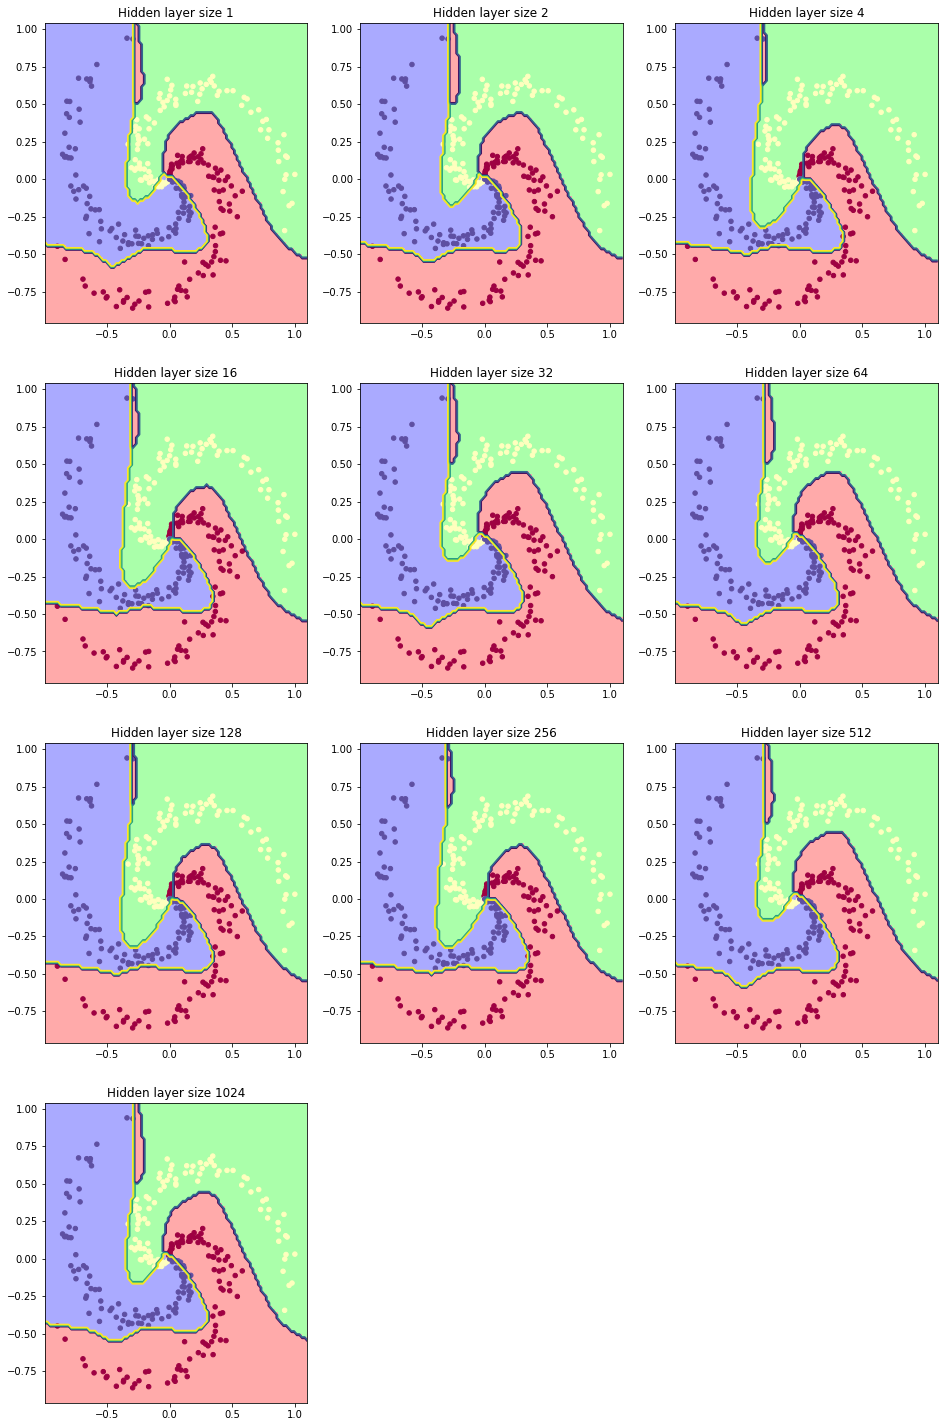

In [59]:
net.plotSd(X, y)